# This analysis is aim to identify key feature for clients' deposite habit and target to those of who would be a potential financial product buyer


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### EDA Process

In [4]:
"""
Data_dict
1 - age: (numeric)
2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education: (categorical: primary, secondary, tertiary and unknown)
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
8 - balance: Balance of the individual.
9 - contact: contact communication type (categorical: 'cellular','telephone')
10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11 - day: last contact day of the month
12 - duration: last contact duration, in seconds (numeric). 
Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):
21 Deposite- has the client subscribed a term deposit? (binary: 'yes','no')
"""

"\nData_dict\n1 - age: (numeric)\n2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')\n3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)\n4 - education: (categorical: primary, secondary, tertiary and unknown)\n5 - default: has credit in default? (categorical: 'no','yes','unknown')\n6 - housing: has housing loan? (categorical: 'no','yes','unknown')\n7 - loan: has personal loan? (categorical: 'no','yes','unknown')\n8 - balance: Balance of the individual.\n9 - contact: contact communication type (categorical: 'cellular','telephone')\n10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')\n11 - day: last contact day of the month\n12 - duration: last contact duration, in seconds (numeric). \nImportant note: this attribute highly affects the output ta

In [5]:
df = pd.read_csv('bank_DATA.csv')

In [6]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
print(f"row: {df.shape[0]} column: {df.shape[1]}")

row: 11162 column: 17


In [9]:
missing_value = df.isnull().sum()
print(missing_value)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


There is no missinig data(unknow value will be later analyzed), missing value can be replace or removed depend case by case. 

In [10]:
repeated_value = df.duplicated().sum()
print(f"repeated_value = {repeated_value}")

repeated_value = 0


In [11]:
### Statistical value for integer 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


This brings a picture of our major deposite clients, mid-age, with an average of 3k deposite. Moreover, dataset gives of some campaign process detail about 

In [12]:
print(df["deposit"].value_counts())
print(df["deposit"].value_counts(normalize=True))

deposit
no     5873
yes    5289
Name: count, dtype: int64
deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64


In [13]:
balance_ratio = (df[df['deposit']== 'yes']['deposit'].count())/(df[df['deposit']== 'no']['deposit'].count())
balance_ratio



np.float64(0.9005618934105227)

Our desire target varible has balance ratio of 0.9, thus the distrubution is almost well balanced so no more balancing steps need to be take, and accurecy ratio can be considered as valuble index

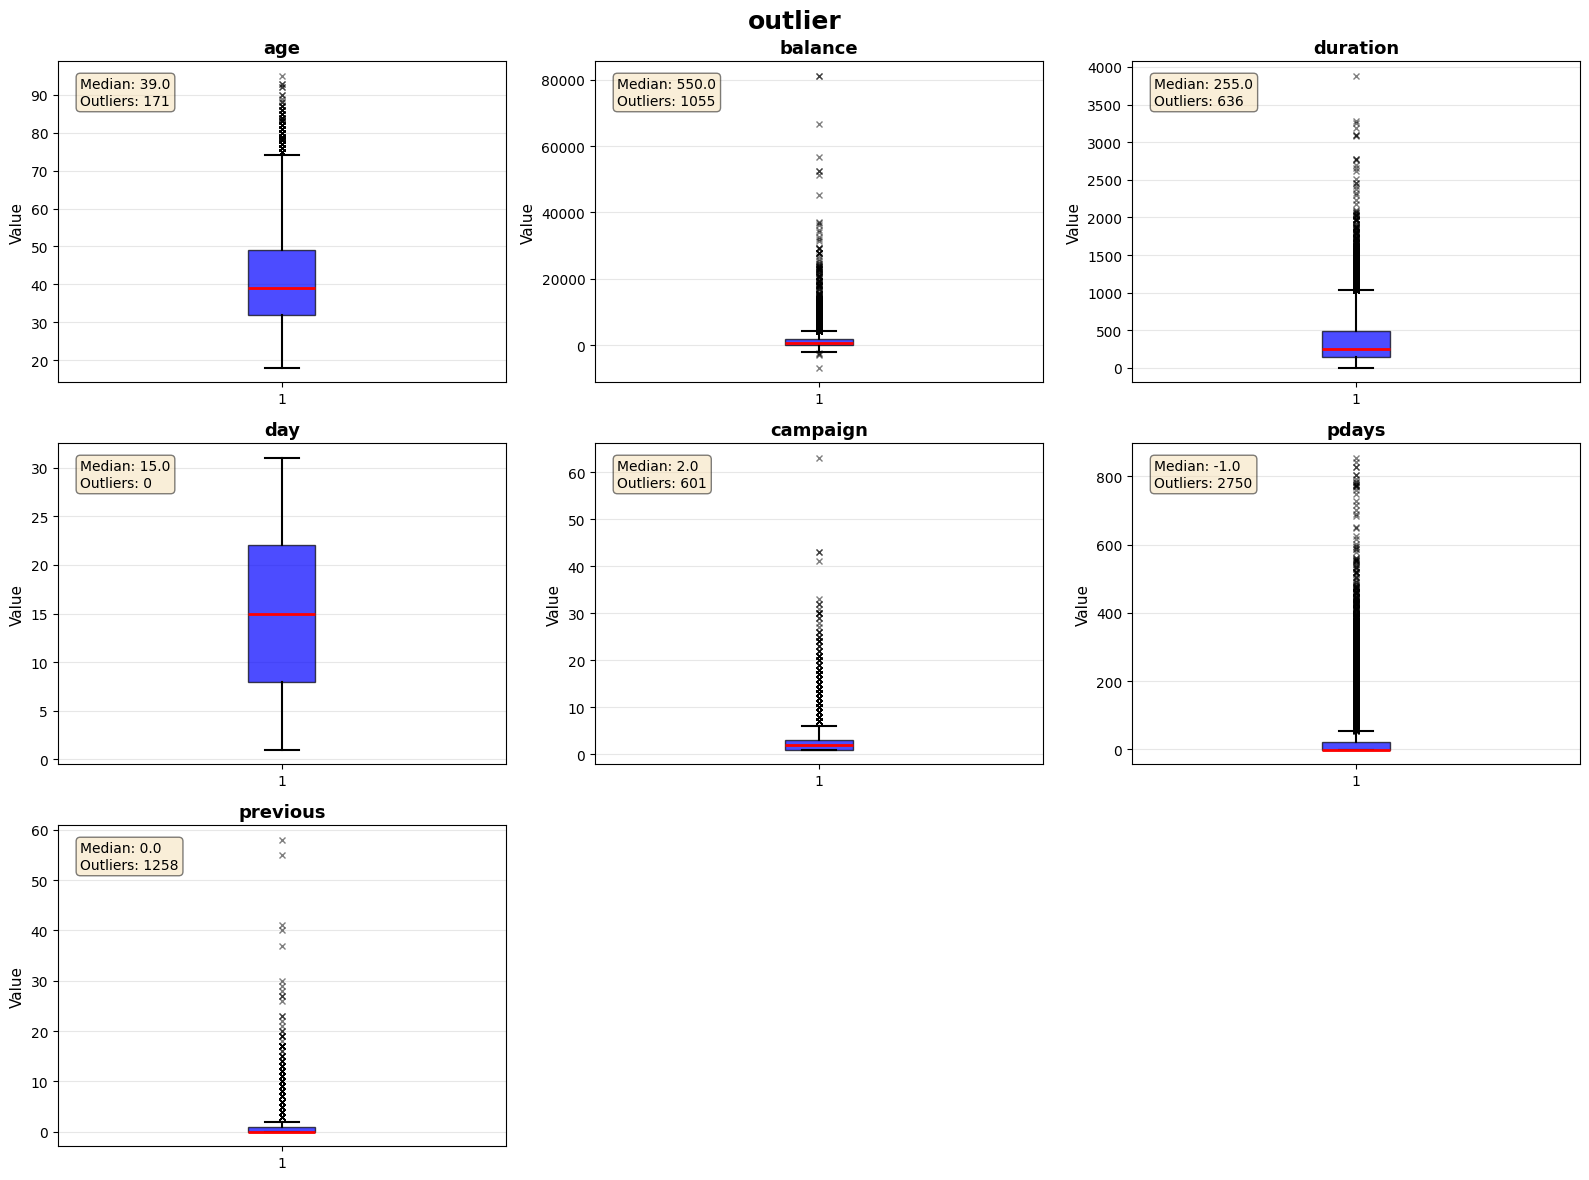

In [14]:
numerical_cols = ['age', 'balance','duration', 'day', 'campaign', 'pdays', 'previous']
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
fig.suptitle('outlier', fontsize=18, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    bp = ax.boxplot(df[col], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='blue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(color='black', linewidth=1.5),
                    capprops=dict(color='black', linewidth=1.5),
                    flierprops=dict(marker='x', markerfacecolor='red', 
                                   markersize=5, alpha=0.5))
    
    ax.set_title(f'{col}', fontsize=13, fontweight='bold')
    ax.set_ylabel('Value', fontsize=11)
    ax.grid(True, alpha=0.3, axis='y')
    
    # calculate statistic 
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    median = df[col].median()
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = len(df[(df[col] < lower) | (df[col] > upper)])
    
    # show statistic 
    textstr = f'Median: {median:.1f}\nOutliers: {n_outliers}'
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# remove blank
for idx in range(len(numerical_cols), 9):
    row = idx // 3
    col_idx = idx % 3
    fig.delaxes(axes[row, col_idx])

plt.tight_layout()
plt.savefig('outlier_boxplots.png', dpi=150, bbox_inches='tight')
plt.show()

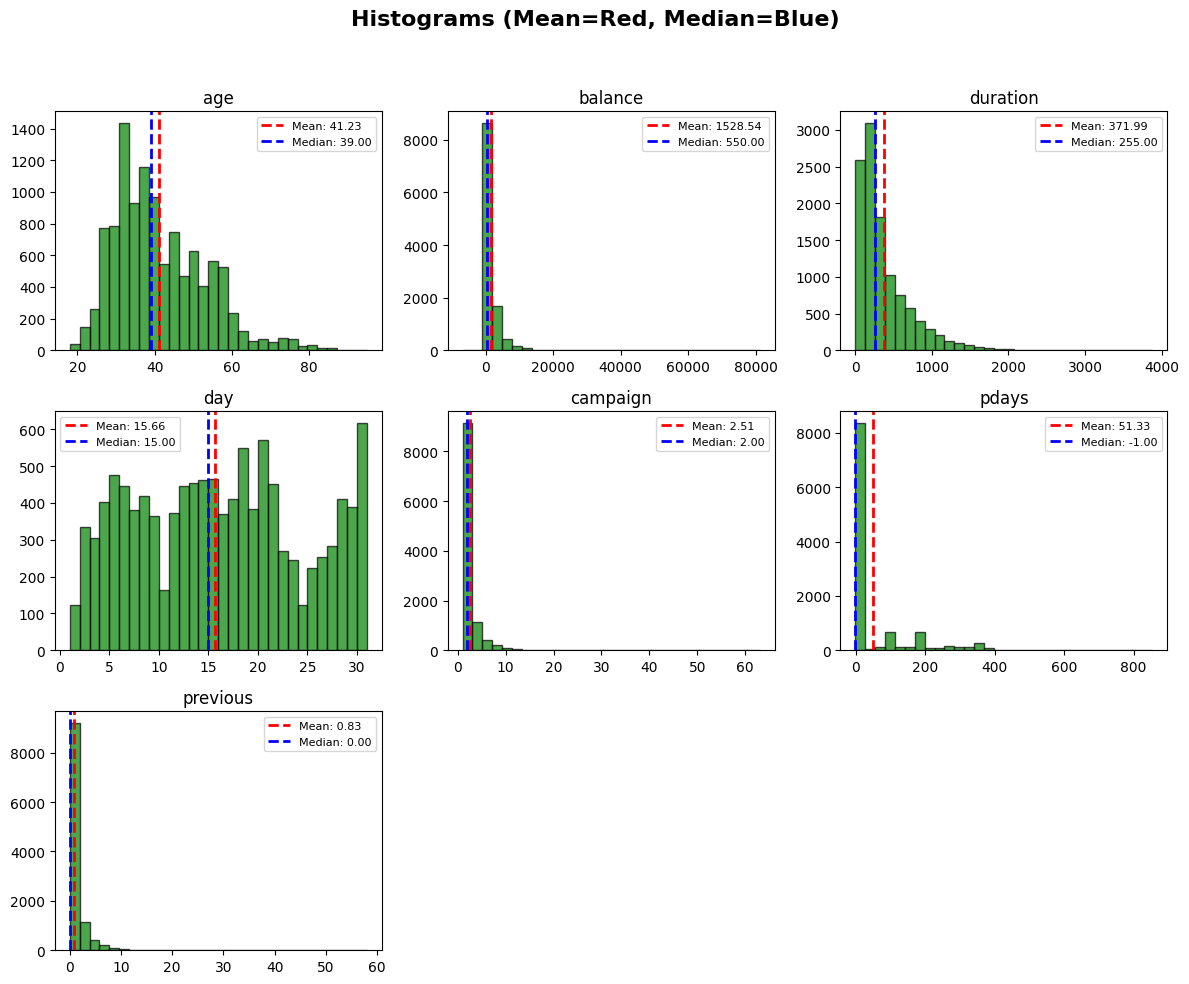

In [15]:
# Histograms
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle('Histograms (Mean=Red, Median=Blue)', fontsize=16, fontweight='bold')

axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    x = df[col].dropna()
    ax.hist(x, bins=30, alpha=0.7, color="Green", edgecolor='black')

    # Mean / Median
    mean_val = x.mean()
    median_val = x.median()

    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
    ax.axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f"Median: {median_val:.2f}")

    ax.set_title(col)
    ax.legend(fontsize=8)

for j in range(len(numerical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Data quality is strong, with no missing values or duplicates, and the target variable is reasonably balanced (90/10).

Feature distributions show noticeable skewness:

Age is mildly skewed, with values above 78 treated as outliers.

Balance is heavily right-skewed, with extreme values ranging from 20,000 to 80,000.

Day is approximately uniformly distributed and shows low correlation with the target.

Campaign, pdays, and duration are severely right-skewed.

Previous is zero-inflated, with most values equal to zero.

All numerical features contain outliers, but most of them reflect genuine business behavior rather than data errors.

Feature engeeniier

In [16]:
#Given the fact that duration is not a depending varible of out desired target so we drop it
df_clean = df.copy()
df_clean = df.drop(columns='duration')

In [17]:
num_never_contact = (df_clean['pdays'] == -1).sum()/len(df_clean)
num_never_contact


np.float64(0.745744490234725)

since we have significant portion of never contacted, thus create feature 'contacted_before' to categorize cunstomer 

In [18]:
# Create feature group clinets by contact, replace none value(-1) as 999 meaning contacted long times ago
df_clean['was_contacted_before'] = (df_clean['pdays'] != -1).astype(int)
df_clean['pdays_cleaned'] = df_clean['pdays'].replace(-1, 999)

print(f"  Pior contacted clients portion: {df_clean['was_contacted_before'].sum()} ({df_clean['was_contacted_before'].mean()*100:.1f}%)")

  Pior contacted clients portion: 2838 (25.4%)


In [19]:
# Range clients feature into groups 


# Age
df_clean['age_group'] = pd.cut(df_clean['age'], 
                                bins=[0, 30, 40, 50, 60, 100],
                                labels=['young', 'middle_young', 'middle', 'middle_old', 'senior'])
# Balance
df_clean['balance_group'] = pd.cut(df_clean['balance'],
                                    bins=[-np.inf, 0, 1000, 5000, 10000, np.inf],
                                    labels=['negative', 'low', 'medium', 'high', 'very_high'])

# Campaign
df_clean['campaign_group'] = pd.cut(df_clean['campaign'],
                                     bins=[0, 1, 2, 3, np.inf],
                                     labels=['once', 'twice', 'three_times', 'many_times'])
# convert month into quarter
month_to_quarter = {
    'jan': 'Q1', 'feb': 'Q1', 'mar': 'Q1',
    'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
    'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3',
    'oct': 'Q4', 'nov': 'Q4', 'dec': 'Q4'
}
df_clean['quarter'] = df_clean['month'].map(month_to_quarter)

# if previous compaign success rate
df_clean['prev_success'] = (df_clean['poutcome'] == 'success').astype(int)
print(f"prev_success:  {df_clean['prev_success'].sum()} ({df_clean['prev_success'].mean()*100:.1f}%)")

print(f"  new_data_shape: {df_clean.shape}")

prev_success:  1071 (9.6%)
  new_data_shape: (11162, 23)


In [20]:
df_clean.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,deposit,was_contacted_before,pdays_cleaned,age_group,balance_group,campaign_group,quarter,prev_success
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,0,unknown,yes,0,999,middle_old,medium,once,Q2,0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,0,unknown,yes,0,999,middle_old,low,once,Q2,0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,0,unknown,yes,0,999,middle,medium,once,Q2,0
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,0,unknown,yes,0,999,middle_old,medium,once,Q2,0
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,0,unknown,yes,0,999,middle_old,low,twice,Q2,0
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,...,0,unknown,yes,0,999,middle,negative,twice,Q2,0
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,...,0,unknown,yes,0,999,middle_old,low,once,Q2,0
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,...,0,unknown,yes,0,999,middle_old,low,once,Q2,0
8,37,technician,married,secondary,no,1,yes,no,unknown,6,...,0,unknown,yes,0,999,middle_young,low,once,Q2,0
9,28,services,single,secondary,no,5090,yes,no,unknown,6,...,0,unknown,yes,0,999,young,high,three_times,Q2,0


In [21]:
# Create dict to Prep for feature impoatance
features_config = [
    {
        "col": "age_group",
        "title": "Age Group vs Subscription",
        "color": "Blue",
        "xticklabels": None,
        "rotation": 45
    },
    {
        "col": "balance_group",
        "title": "Balance Group vs Subscription",
        "color": "Green",
        "xticklabels": None,
        "rotation": 45
    },
    {
        "col": "campaign_group",
        "title": "Campaign Group vs Subscription",
        "color": "Red",
        "xticklabels": None,
        "rotation": 45
    },
    {
        "col": "quarter",
        "title": "Quarter vs Subscription",
        "color": "Orange",
        "xticklabels": None,
        "rotation": 0
    },
    {
        "col": "was_contacted_before",
        "title": "Was Contacted Before vs Subscription",
        "color": "purple",
        "xticklabels": ["No", "Yes"],
        "rotation": 0
    },
    {
        "col": "prev_success",
        "title": "Previous Success vs Subscription",
        "color": "Black",
        "xticklabels": ["No", "Yes"],
        "rotation": 0
    }
]


In [22]:
baseline_rate = df_clean['deposit'].value_counts(normalize=True)['yes'] * 100

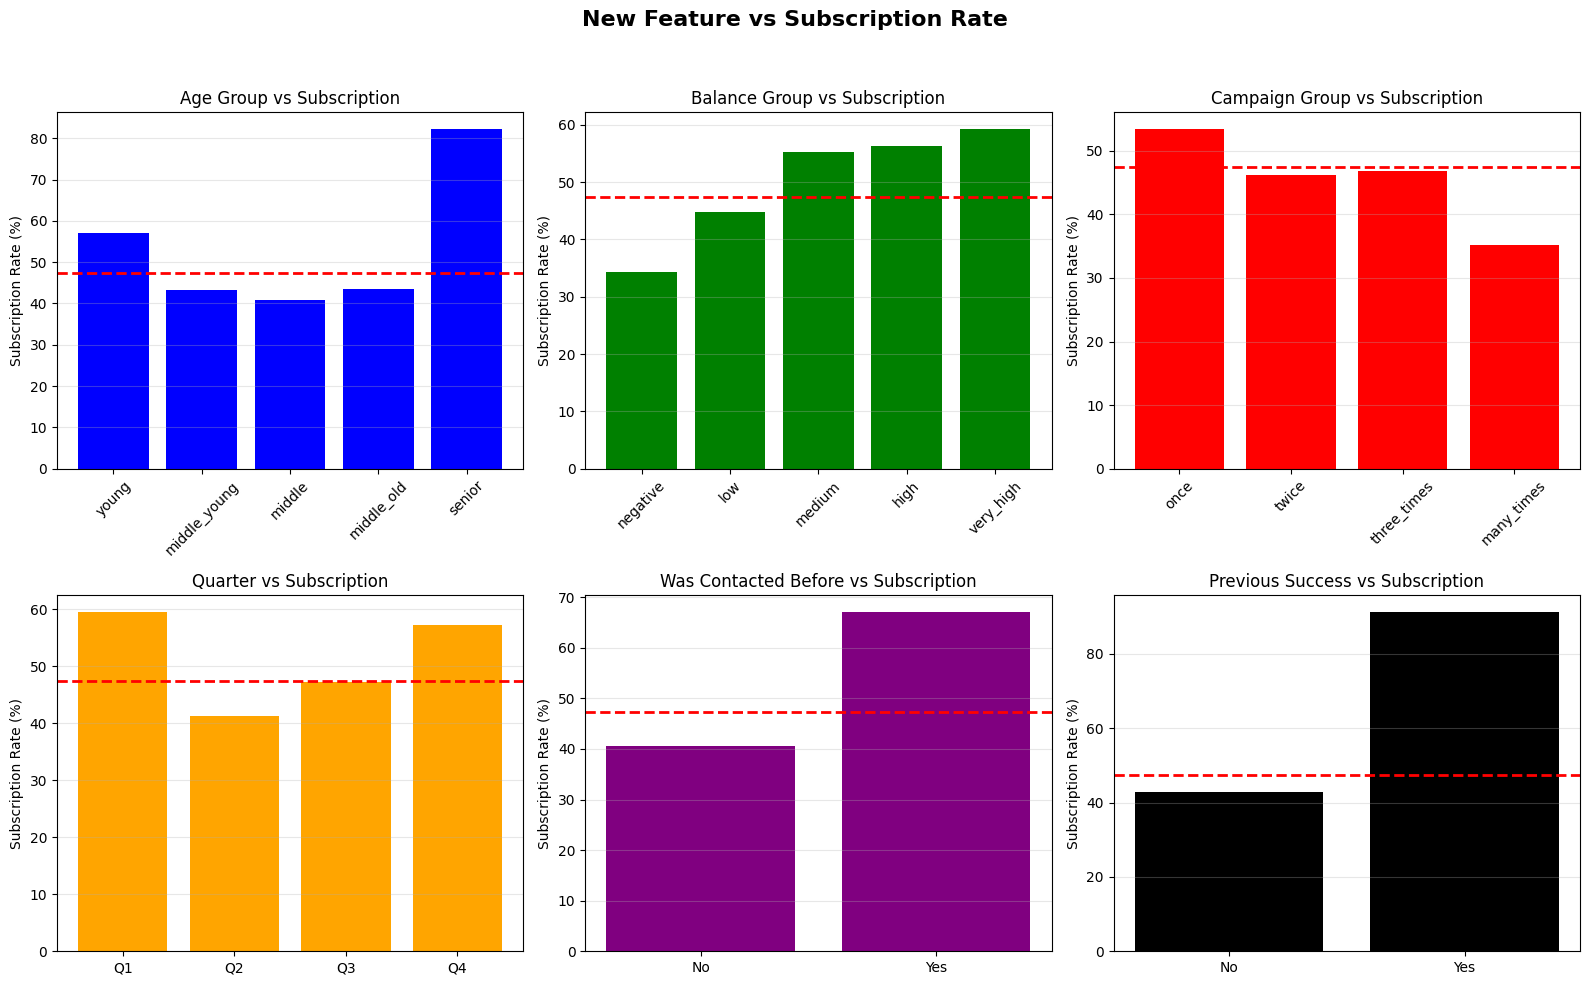

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('New Feature vs Subscription Rate', fontsize=16, fontweight='bold')

axes = axes.flatten()

for ax, cfg in zip(axes, features_config):
    col = cfg["col"]

    rate = df_clean.groupby(col)['deposit'].apply(
        lambda x: (x == 'yes').mean() * 100
    )

    ax.bar(range(len(rate)), rate.values, color=cfg["color"])

    ax.set_xticks(range(len(rate)))
    if cfg["xticklabels"] is not None:
        ax.set_xticklabels(cfg["xticklabels"], rotation=cfg["rotation"])
    else:
        ax.set_xticklabels(rate.index, rotation=cfg["rotation"])

    ax.set_ylabel('Subscription Rate (%)')
    ax.set_title(cfg["title"])

    # baseline
    ax.axhline(y=baseline_rate, color='red', linestyle='--', linewidth=2)

    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('new_features_analysis.png', dpi=150, bbox_inches='tight')
plt.show()


In [24]:
# impact level groupby each feature where impact level = max(sub rate) - min(sub rate) observe impact of single varible to  target varible （Univariate Analysis）

In [25]:
# Modeling prep 
y = (df_clean['deposit'] == 'yes').astype(int)

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'poutcome',
                       'age_group', 'balance_group', 'campaign_group', 'quarter']


# One-Hot Encoding for categarical data 
df_encoded = pd.get_dummies(df_clean[categorical_features], 
                            drop_first=True,  # aviod co-linearity
                            dtype=int)


numerical_features = ['age', 'balance', 'campaign', 
                     'pdays_cleaned', 'previous', 
                     'was_contacted_before', 'prev_success']

for col in numerical_features:
    df_encoded[col] = df_clean[col]

X= df_encoded
X.head(10)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,quarter_Q2,quarter_Q3,quarter_Q4,age,balance,campaign,pdays_cleaned,previous,was_contacted_before,prev_success
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,59,2343,1,999,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,56,45,1,999,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,41,1270,1,999,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,55,2476,1,999,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,54,184,2,999,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,1,0,0,42,0,2,999,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,1,0,0,56,830,1,999,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,1,0,0,60,545,1,999,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,1,0,0,37,1,1,999,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,1,0,0,28,5090,3,999,0,0,0


Given the fact that weather clients subscribe is a binary classification questioin(yes/no) we will consider using logistical regression, random forest, Gradient boosting 

In [26]:
# Use 80% data for model trainning, and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [27]:
#Standarderlize data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
age_idx = X.columns.get_loc('age')


In [28]:
# Mechaine learning package 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, classification_report, 
                            confusion_matrix)

In [29]:

#Logistic Regression

lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,    
    solver='lbfgs'    
)

# Trainning 
lr_model.fit(X_train_scaled, y_train)

# Predict

lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# validation
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred_proba)

#Scoring
Accuracy_log = lr_accuracy
Precision_log = lr_precision
Recall_log = lr_recall
F1Score_log = lr_f1
ROCAUC_log = lr_auc


In [30]:
print(f"Accuracy:{Accuracy_log}")
print(f"Precision:{Precision_log}")
print(f"Recall:{Recall_log}")
print(f"F1Score_log:{F1Score_log}")
print(f"ROC-AUC:{ROCAUC_log}")

Accuracy:0.7102552619793999
Precision:0.7527675276752768
Recall:0.5784499054820416
F1Score_log:0.6541956173169428
ROC-AUC:0.7629393074045772


In [33]:
#Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,     
    max_depth=15,        
    min_samples_split=10,  
    min_samples_leaf=5,   
    random_state=42,
    n_jobs=-1               
)

rf_model.fit(X_train, y_train)


# Prediction
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Validation
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred_proba)

print(f"Accuracy:  {rf_accuracy*100:.2f}%")
print(f"Precision: {rf_precision*100:.2f}%")
print(f"Recall:    {rf_recall*100:.2f}%")
print(f"F1-Score:  {rf_f1*100:.2f}%")
print(f"ROC-AUC:   {rf_auc:.4f}")


Accuracy:  72.82%
Precision: 78.08%
Recall:    59.26%
F1-Score:  67.38%
ROC-AUC:   0.7824


In [35]:
#Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=100,       
    learning_rate=0.1,    
    max_depth=5,           
    min_samples_split=10,   
    min_samples_leaf=5,    
    random_state=42
)

# Train
gb_model.fit(X_train, y_train)



# Prediction
gb_pred = gb_model.predict(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Validation
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
gb_auc = roc_auc_score(y_test, gb_pred_proba)

print(f"Accuracy:  {gb_accuracy*100:.2f}%")
print(f"Precision: {gb_precision*100:.2f}%")
print(f"Recall:    {gb_recall*100:.2f}%")
print(f"F1-Score:  {gb_f1*100:.2f}%")
print(f"ROC-AUC:   {gb_auc:.4f}")


Accuracy:  72.64%
Precision: 77.49%
Recall:    59.55%
F1-Score:  67.34%
ROC-AUC:   0.7823


In [36]:
model_selection = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, gb_accuracy, Accuracy_log],
    'Precision': [rf_precision, gb_precision, Precision_log],
    'Recall': [rf_recall, gb_recall, Recall_log],
    'F1': [rf_f1, gb_f1, F1Score_log],
    'AUC': [rf_auc, gb_auc, ROCAUC_log]
})

print(model_selection)


                 Model  Accuracy  Precision    Recall        F1       AUC
0        Random Forest  0.728168   0.780822  0.592628  0.673831  0.782380
1    Gradient Boosting  0.726377   0.774908  0.595463  0.673437  0.782320
2  Logistic Regression  0.710255   0.752768  0.578450  0.654196  0.762939


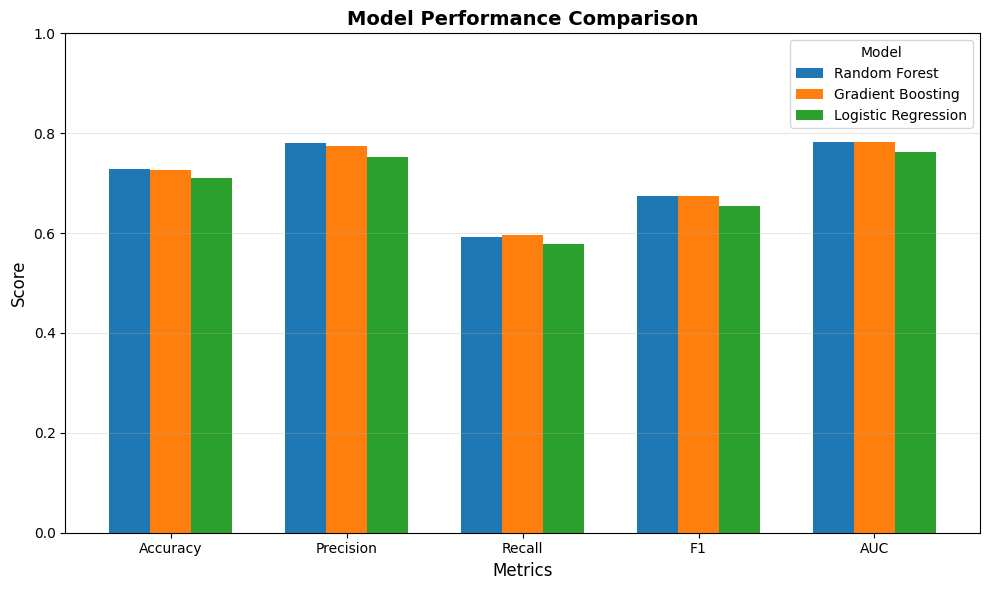

In [37]:
model_selection.set_index('Model').T.plot(kind='bar', figsize=(10, 6), width=0.7)

plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title='Model')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [38]:
# Overfitting check

# logistic Regression 
lr_train_pred = lr_model.predict(X_train_scaled)
lr_train_proba = lr_model.predict_proba(X_train_scaled)[:, 1]
lr_train_acc = accuracy_score(y_train, lr_train_pred)
lr_train_auc = roc_auc_score(y_train, lr_train_proba)

# Radom Forest
rf_train_pred = rf_model.predict(X_train)
rf_train_proba = rf_model.predict_proba(X_train)[:, 1]
rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_train_auc = roc_auc_score(y_train, rf_train_proba)

# Gradient Boosting
gb_train_pred = gb_model.predict(X_train)
gb_train_proba = gb_model.predict_proba(X_train)[:, 1]
gb_train_acc = accuracy_score(y_train, gb_train_pred)
gb_train_auc = roc_auc_score(y_train, gb_train_proba)

# Create Table 
overfitting_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Train_Accuracy': [lr_train_acc, rf_train_acc, gb_train_acc],
    'Test_Accuracy': [lr_accuracy, rf_accuracy, gb_accuracy],
    'Accuracy_Diff': [lr_train_acc - lr_accuracy, 
                     rf_train_acc - rf_accuracy, 
                     gb_train_acc - gb_accuracy],
    'Train_AUC': [lr_train_auc, rf_train_auc, gb_train_auc],
    'Test_AUC': [lr_auc, rf_auc, gb_auc],
    'AUC_Diff': [lr_train_auc - lr_auc, 
                rf_train_auc - rf_auc, 
                gb_train_auc - gb_auc]
})

overfitting_results

,Model,Train_Accuracy,Test_Accuracy,Accuracy_Diff,Train_AUC,Test_AUC,AUC_Diff
0,Logistic Regression,0.716766,0.710255,0.00651,0.776121,0.762939,0.013181
1,Random Forest,0.777579,0.728168,0.04941,0.871995,0.782380,0.089615
2,Gradient Boosting,0.772987,0.726377,0.04661,0.853261,0.782320,0.070941


In [ ]:
#Radom forest model is the best model given the highest Accuracy ratio and Accuracy_Diff is <5% which might consider minor overffting. Which can be reduced by adjest tree paramter or reduce the complexity of dataframe

In [39]:
#Modle Selection 
best_pred = rf_pred
best_pred_proba = rf_pred_proba

cm = confusion_matrix(y_test, best_pred)
print("\nComfusion Matrix:")
print(f"No        {cm[0,0]:5d}  {cm[0,1]:5d}")
print(f"Yes       {cm[1,0]:5d}  {cm[1,1]:5d}")




Comfusion Matrix:
No          999    176
Yes         431    627


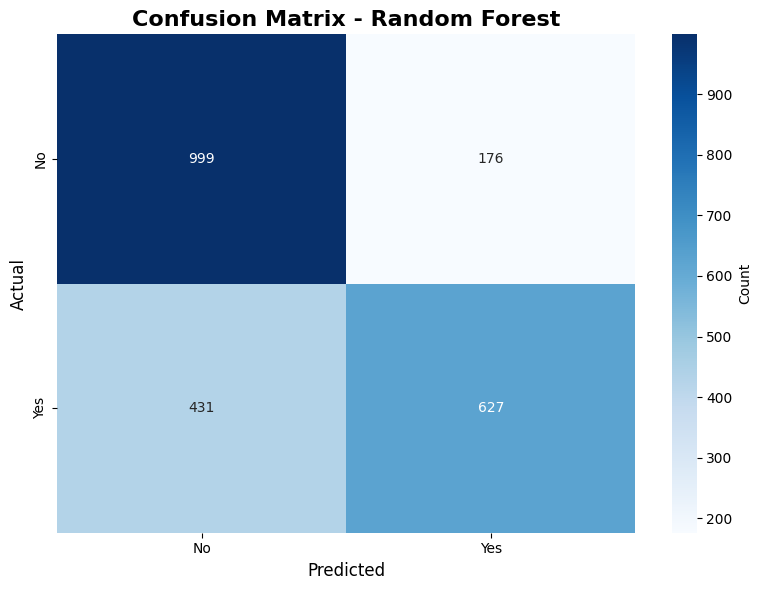

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], 
            yticklabels=['No', 'Yes'],
            cbar_kws={'label': 'Count'})

plt.title('Confusion Matrix - Random Forest', fontsize=16, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

In [41]:
# Feature Importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

feature_importance.head(15)


,feature,importance
50,balance,0.097061
49,age,0.087541
20,contact_unknown,0.084018
55,prev_success,0.064369
33,poutcome_success,0.062266
52,pdays_cleaned,0.058001
17,housing_yes,0.044477
51,campaign,0.035374
53,previous,0.030012
28,month_may,0.026389


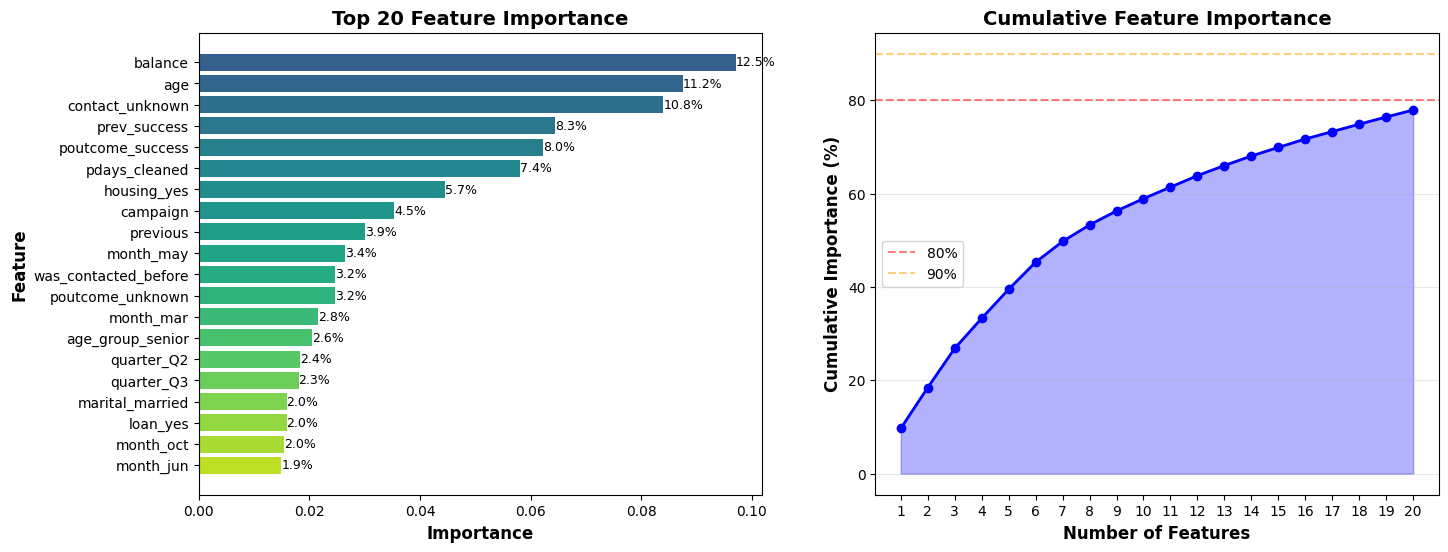

In [48]:
# Importance visualazation 
top_features = feature_importance.head(20)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_features)))
bars = ax1.barh(top_features['feature'], top_features['importance'], color=colors)
ax1.set_xlabel('Importance', fontsize=12, fontweight='bold')
ax1.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax1.set_title('Top 20 Feature Importance', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

for i, (bar, importance) in enumerate(zip(bars, top_features['importance'])):
    percentage = (importance / top_features['importance'].sum()) * 100
    ax1.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{percentage:.1f}%', 
             ha='left', va='center', fontsize=9)

#Cumalative curve
cumulative = top_features['importance'].cumsum()
cumulative_pct = (cumulative / feature_importance['importance'].sum()) * 100

ax2.plot(range(len(top_features)), cumulative_pct, 
         marker='o', linewidth=2, markersize=6, color='Blue')
ax2.fill_between(range(len(top_features)), cumulative_pct, alpha=0.3, color='Blue')
ax2.set_xlabel('Number of Features', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Importance (%)', fontsize=12, fontweight='bold')
ax2.set_title('Cumulative Feature Importance', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(top_features)))
ax2.set_xticklabels(range(1, len(top_features)+1))
ax2.grid(axis='y', alpha=0.3)

ax2.axhline(y=80, color='red', linestyle='--', alpha=0.5, label='80%')
ax2.axhline(y=90, color='orange', linestyle='--', alpha=0.5, label='90%')
ax2.legend()
plt.show()

In [ ]:
bank_data = pd.read_csv('bank_DATA.csv')

test_predictions_proba = rf_model.predict_proba(X_test)[:, 1]

#Create customer label
def assign_tier(probability):
    if probability >= 0.7:
        return 'Tier 1 - High Priority'
    elif probability >= 0.5:
        return 'Tier 2 - Medium Priority'
    elif probability >= 0.3:
        return 'Tier 3 - Low Priority'
    else:
        return 'Tier 4 - Very Low Priority'

# 4. Create Labeled dataframe 
customer_labels = X_test.copy() 
customer_labels['predicted_probability'] = test_predictions_proba
customer_labels['tier'] = customer_labels['predicted_probability'].apply(assign_tier)
customer_labels['actual_deposit'] = y_test.values

# 5. sort
customer_labels = customer_labels.sort_values('predicted_probability', ascending=False).reset_index(drop=True)

# 6. add customer_ID
customer_labels.insert(0, 'customer_id', range(1, len(customer_labels) + 1))

# 8. Save result for PowerBI 
#customer_labels.to_csv('customer_priority_list.csv', index=False)


In [50]:
pd1 = pd.read_csv('customer_priority_list.csv')
pd1['tier'].head(20)

0     Tier 1 - High Priority
1     Tier 1 - High Priority
2     Tier 1 - High Priority
3     Tier 1 - High Priority
4     Tier 1 - High Priority
5     Tier 1 - High Priority
6     Tier 1 - High Priority
7     Tier 1 - High Priority
8     Tier 1 - High Priority
9     Tier 1 - High Priority
10    Tier 1 - High Priority
11    Tier 1 - High Priority
12    Tier 1 - High Priority
13    Tier 1 - High Priority
14    Tier 1 - High Priority
15    Tier 1 - High Priority
16    Tier 1 - High Priority
17    Tier 1 - High Priority
18    Tier 1 - High Priority
19    Tier 1 - High Priority
Name: tier, dtype: object

In [51]:
pd1['tier'].value_counts(normalize=True)


tier
Tier 3 - Low Priority         0.390506
Tier 4 - Very Low Priority    0.249888
Tier 1 - High Priority        0.197940
Tier 2 - Medium Priority      0.161666
Name: proportion, dtype: float64